<a href="https://colab.research.google.com/github/xb24/Deep-Network-Models/blob/main/receptive_field_neuron_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Load and visualize the data

### 1. Load in the spiking data and display a raster plot of the full trial length with the visual stimulus presentation period clearly indicated. Because there are many neurons, it may help to plot only a subset of them.

In [ ]:
from google.colab import files

# upload spike_times.csv
uploaded = files.upload()

Saving spike_times.csv to spike_times.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
import io

df = pd.read_csv(io.BytesIO(uploaded['spike_times.csv']))
print(df)

      NeuronIndex       0       1       2  ...  912  913  914       GaborFilter
0               0  5079.0  5082.0  5090.0  ...  NaN  NaN  NaN   GaborFilter_665
1               1  5081.0  5090.0  5091.0  ...  NaN  NaN  NaN  GaborFilter_5792
2               2  5080.0  5131.0  5138.0  ...  NaN  NaN  NaN  GaborFilter_7524
3               3  5080.0  5084.0  5088.0  ...  NaN  NaN  NaN  GaborFilter_6031
4               4  5080.0  5099.0  5114.0  ...  NaN  NaN  NaN  GaborFilter_5463
...           ...     ...     ...     ...  ...  ...  ...  ...               ...
9995         9995  5077.0  5093.0  5099.0  ...  NaN  NaN  NaN   GaborFilter_466
9996         9996  5079.0  5087.0  5102.0  ...  NaN  NaN  NaN  GaborFilter_3401
9997         9997  5081.0  5084.0  5110.0  ...  NaN  NaN  NaN  GaborFilter_2545
9998         9998  5080.0  5106.0  5107.0  ...  NaN  NaN  NaN  GaborFilter_9237
9999         9999  5080.0  5103.0  5108.0  ...  NaN  NaN  NaN  GaborFilter_8129

[10000 rows x 917 columns]


In [ ]:
df_spiking = df.drop(['GaborFilter','NeuronIndex'], axis=1)
neuralData = df_spiking.to_numpy()
# neuralData = neuralData[~np.isnan(neuralData)]
neuralData

array([[5079., 5082., 5090., ...,   nan,   nan,   nan],
       [5081., 5090., 5091., ...,   nan,   nan,   nan],
       [5080., 5131., 5138., ...,   nan,   nan,   nan],
       ...,
       [5081., 5084., 5110., ...,   nan,   nan,   nan],
       [5080., 5106., 5107., ...,   nan,   nan,   nan],
       [5080., 5103., 5108., ...,   nan,   nan,   nan]])

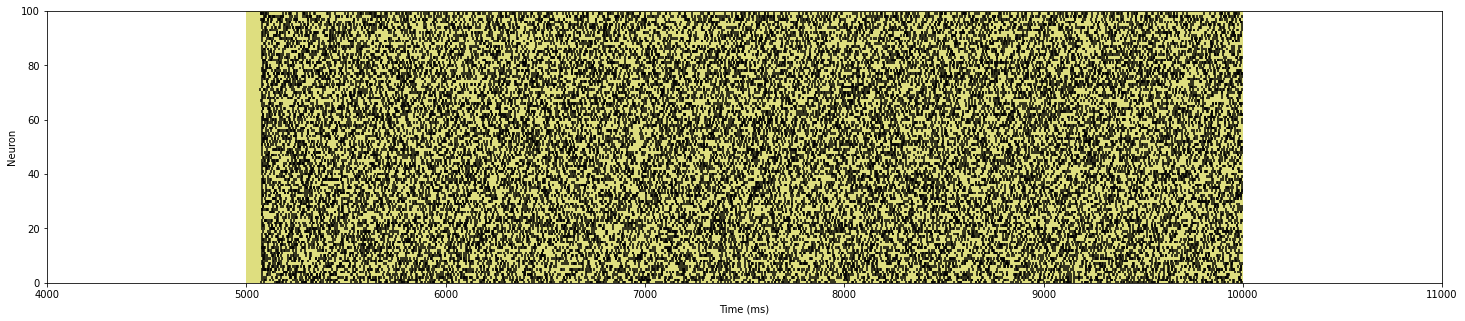

In [ ]:
# choose random set of 100 neurons
import random
neuron_subgroup = random.sample(range(0,9999), 100)

# plot the neuron firing raster plot
figure_1 = plt.figure(figsize=(25,5))
colors = 'black'
plt.eventplot(neuralData[np.array(neuron_subgroup),:],colors=colors)
plt.xlim(4000, 11000)
# plt.xlim(5000, 6000)
plt.ylim(0, 100)
plt.ylabel('Neuron')
plt.xlabel('Time (ms)')

a = 5000
b = 10000

plt.axvspan(a, b, color='y', alpha=0.5, lw=0)

### 2. Write a function that can take in a single neuron's spiking activity and output a firing rate over time. You can use one of the methods discussed in class (binning, sliding window, Gaussian, etc.) or a method of your own design. Plot these for a few random cells from the population.

In [ ]:
# define the function of firing rate visualization

def firing_rate(activity, method):
  figure_2 = plt.figure(figsize=(8,6))
  plt.xlim(0, 15000)
  if method == 'binning':
    figure_2 = plt.hist(activity, bins=100);

  elif method == 'sliding window':
    activity = activity[~np.isnan(activity)]
    dt = 30 # window size 30
    rate = np.array([])
    for t in range(15,14985):  #(50,14950)
      w = 0
      for i in range(np.argmin(activity),np.argmax(activity)):
        if activity[i] < t+dt/2 and ((activity[i] > t-dt/2) or (activity[i] == t-dt/2)):
          w += 1/dt
        else:
          w = w
      rate = np.append(rate,w)
    figure_2 = plt.plot(rate)
    plt.ylabel('kHz')
    plt.xlabel('Time (ms)')
  return figure_2

(array([6., 7., 3., 5., 1., 4., 2., 7., 8., 2., 2., 3., 3., 4., 2., 2., 5.,
        3., 3., 0., 3., 2., 3., 4., 4., 3., 4., 2., 7., 5., 6., 2., 2., 2.,
        3., 8., 3., 2., 4., 4., 1., 1., 4., 4., 7., 4., 5., 6., 3., 4., 3.,
        7., 1., 3., 2., 6., 1., 3., 2., 3., 5., 3., 5., 3., 4., 4., 4., 2.,
        3., 5., 6., 7., 4., 3., 3., 3., 4., 3., 6., 5., 4., 8., 3., 5., 5.,
        3., 2., 2., 7., 4., 2., 2., 2., 2., 2., 1., 5., 5., 9., 4.]),
 array([5079.  , 5127.91, 5176.82, 5225.73, 5274.64, 5323.55, 5372.46,
        5421.37, 5470.28, 5519.19, 5568.1 , 5617.01, 5665.92, 5714.83,
        5763.74, 5812.65, 5861.56, 5910.47, 5959.38, 6008.29, 6057.2 ,
        6106.11, 6155.02, 6203.93, 6252.84, 6301.75, 6350.66, 6399.57,
        6448.48, 6497.39, 6546.3 , 6595.21, 6644.12, 6693.03, 6741.94,
        6790.85, 6839.76, 6888.67, 6937.58, 6986.49, 7035.4 , 7084.31,
        7133.22, 7182.13, 7231.04, 7279.95, 7328.86, 7377.77, 7426.68,
        7475.59, 7524.5 , 7573.41, 7622.32, 7671.23, 

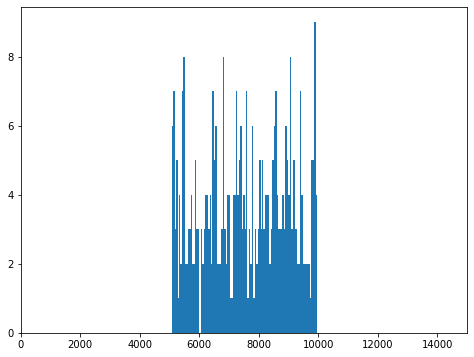

In [ ]:
# using binnin method (just to check if the sliding method is correctly coded)
firing_rate(neuralData[0,:],'binning')

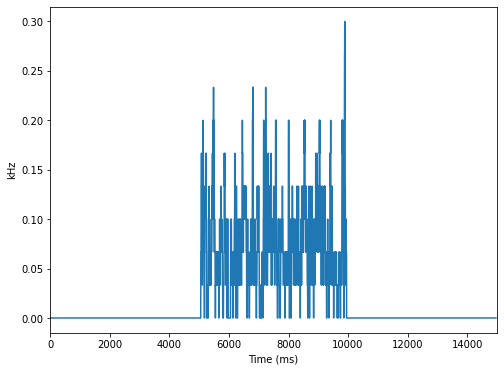

In [ ]:
# using sliding window method to find the firing rate of a few random neurons
firing_rate(neuralData[0,:],'sliding window')

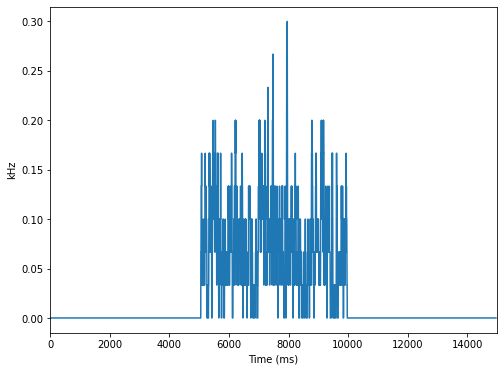

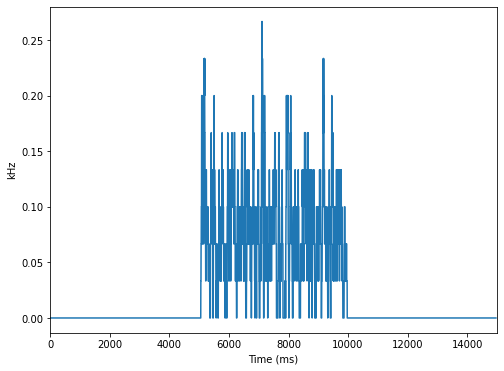

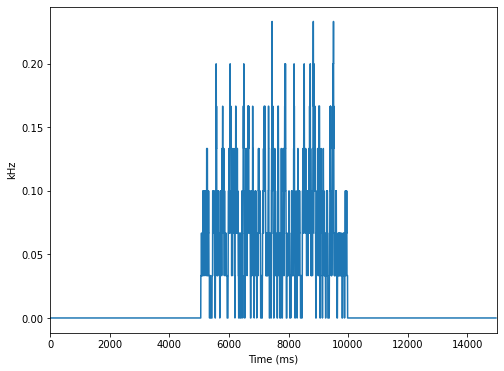

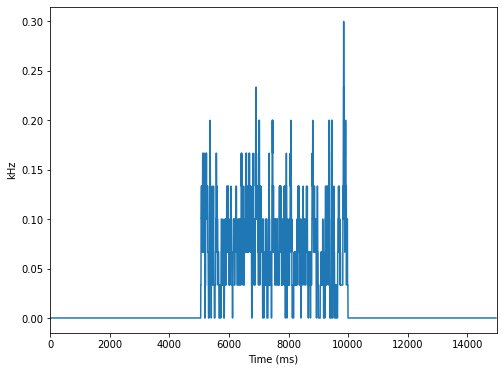

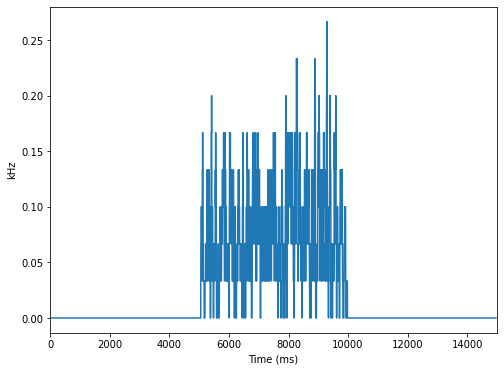

In [ ]:
neuron_subgroup = random.sample(range(0,9999), 5)
for i in neuron_subgroup:
  firing_rate(neuralData[i,:],'sliding window')

### 3. Visualize the receptive fields of the 5 neurons with the shortest, and the 5 neurons with the longest, latency to first spike relative to stimulus onset. Include colorbars.

In [ ]:
# upload the filters.mat
uploaded = files.upload()

Saving filters.mat to filters.mat


In [ ]:
import scipy.io
import matplotlib as mpl
filters = scipy.io.loadmat('filters.mat')
all_arr = (filters['gabor_filters'])

In [ ]:
# define the function of receptive field visualization
def receptive_field(index):
  GaborFilter = int(df.iloc[index]['GaborFilter'].strip('GaborFilter_'))
  figure_3 = plt.imshow(all_arr[:,:,GaborFilter-1], cmap='gray')
  plt.colorbar()
  print(GaborFilter)
  return figure_3

In [ ]:
df_rank = df
df_rank['rank_long'] = df['0'].rank(ascending=False)
df_rank['rank_short'] = df['0'].rank(ascending=True)
df_rank

,NeuronIndex,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,GaborFilter,rank_long,rank_short
0,0,5079.0,5082.0,5090.0,5092.0,5097.0,5114.0,5131.0,5138.0,5139.0,5149.0,5154.0,5160.0,5169.0,5207.0,5211.0,5216.0,5235.0,5239.0,5244.0,5246.0,5249.0,5286.0,5332.0,5334.0,5340.0,5360.0,5380.0,5408.0,5422.0,5433.0,5445.0,5449.0,5460.0,5468.0,5469.0,5480.0,5482.0,5494.0,5496.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GaborFilter_665,8644.5,1356.5
1,1,5081.0,5090.0,5091.0,5098.0,5115.0,5119.0,5123.0,5138.0,5174.0,5179.0,5213.0,5218.0,5222.0,5238.0,5243.0,5253.0,5254.0,5266.0,5288.0,5291.0,5298.0,5304.0,5323.0,5324.0,5335.0,5342.0,5344.0,5345.0,5354.0,5356.0,5363.0,5365.0,5370.0,5374.0,5387.0,5412.0,5419.0,5430.0,5432.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GaborFilter_5792,1512.5,8488.5
2,2,5080.0,5131.0,5138.0,5140.0,5156.0,5160.0,5175.0,5278.0,5299.0,5314.0,5324.0,5330.0,5336.0,5350.0,5354.0,5359.0,5370.0,5372.0,5382.0,5412.0,5429.0,5439.0,5448.0,5472.0,5475.0,5485.0,5489.0,5494.0,5531.0,5534.0,5546.0,5641.0,5672.0,5681.0,5686.0,5716.0,5722.0,5724.0,5738.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GaborFilter_7524,5042.0,4959.0
3,3,5080.0,5084.0,5088.0,5099.0,5110.0,5130.0,5163.0,5189.0,5204.0,5206.0,5207.0,5221.0,5223.0,5232.0,5254.0,5269.0,5301.0,5327.0,5328.0,5357.0,5367.0,5377.0,5387.0,5393.0,5394.0,5419.0,5425.0,5427.0,5443.0,5445.0,5450.0,5457.0,5467.0,5496.0,5508.0,5511.0,5512.0,5517.0,5534.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GaborFilter_6031,5042.0,4959.0
4,4,5080.0,5099.0,5114.0,5131.0,5152.0,5156.0,5182.0,5185.0,5209.0,5212.0,5234.0,5249.0,5271.0,5285.0,5295.0,5296.0,5309.0,5311.0,5321.0,5331.0,5345.0,5357.0,5369.0,5398.0,5403.0,5423.0,5466.0,5484.0,5492.0,5496.0,5497.0,5513.0,5514.0,5528.0,5561.0,5564.0,5576.0,5584.0,5595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GaborFilter_5463,5042.0,4959.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,5077.0,5093.0,5099.0,5119.0,5135.0,5141.0,5142.0,5146.0,5151.0,5152.0,5153.0,5157.0,5162.0,5168.0,5171.0,5197.0,5201.0,5209.0,5211.0,5220.0,5231.0,5237.0,5245.0,5254.0,5264.0,5270.0,5278.0,5305.0,5326.0,5340.0,5341.0,5348.0,5361.0,5371.0,5381.0,5404.0,5409.0,5425.0,5433.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GaborFilter_466,9566.0,435.0
9996,9996,5079.0,5087.0,5102.0,5110.0,5120.0,5128.0,5145.0,5169.0,5190.0,5200.0,5203.0,5208.0,5222.0,5226.0,5228.0,5241.0,5277.0,5278.0,5287.0,5295.0,5306.0,5311.0,5342.0,5347.0,5355.0,5359.0,5362.0,5378.0,5379.0,5392.0,5405.0,5416.0,5422.0,5423.0,5428.0,5438.0,5440.0,5469.0,5485.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GaborFilter_3401,8644.5,1356.5
9997,9997,5081.0,5084.0,5110.0,5114.0,5130.0,5133.0,5134.0,5136.0,5145.0,5164.0,5182.0,5183.0,5184.0,5201.0,5212.0,5225.0,5243.0,5252.0,52

157


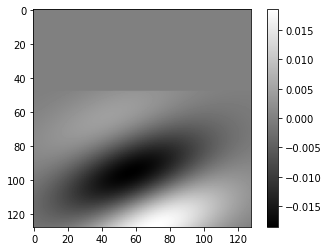

In [ ]:
# the receptive fields of the 5 neurons with the shortest latency to first spike
receptive_field(int(df_rank[df_rank['rank_short']==1]['NeuronIndex']))

235


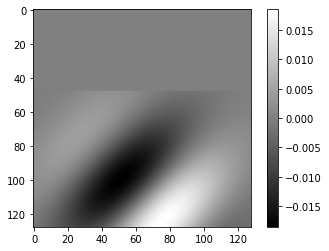

In [ ]:
receptive_field(int(df_rank[df_rank['rank_short']==2]['NeuronIndex']))

67


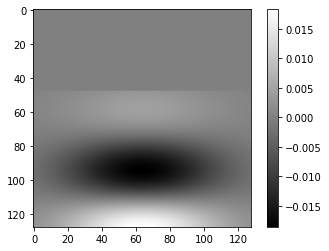

In [ ]:
receptive_field(int(df_rank[df_rank['rank_short']==3]['NeuronIndex']))

55


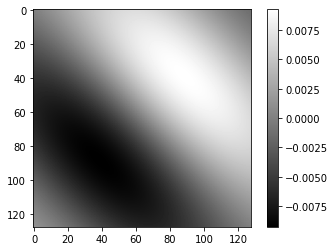

In [ ]:
receptive_field(int(df_rank[df_rank['rank_short']==4]['NeuronIndex']))

187


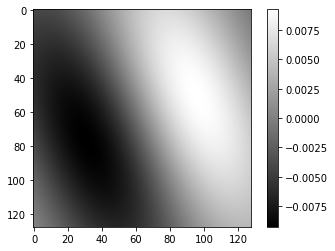

In [ ]:
receptive_field(int(df_rank[df_rank['rank_short']==5]['NeuronIndex']))

146


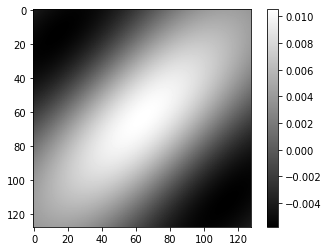

In [ ]:
# the receptive fields of the 5 neurons with the longest latency to first spike
receptive_field(int(df_rank[df_rank['rank_long']==1]['NeuronIndex']))

62


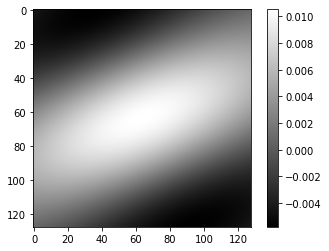

In [ ]:
receptive_field(int(df_rank[df_rank['rank_long']==2]['NeuronIndex']))

222


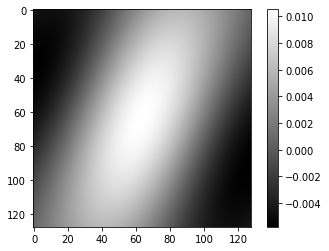

In [ ]:
receptive_field(int(df_rank[df_rank['rank_long']==3]['NeuronIndex']))

20


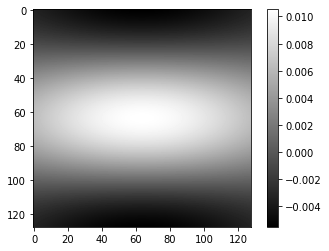

In [ ]:
receptive_field(int(df_rank[df_rank['rank_long']==4]['NeuronIndex']))

16


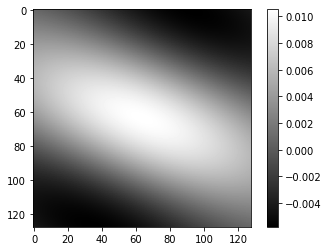

In [ ]:
receptive_field(int(df_rank[df_rank['rank_long']==5]['NeuronIndex']))

### 4. Visualize the receptive fields of the 5 neurons with the slowest, and the 5 neurons with the fastest, spike rates over the duration of the stimulus. Include colorbars

In [ ]:
df_rank['count'] = df_spiking.apply(lambda x: x.count(), axis=1)
df_rank['rank_fast'] = df_rank['count'].rank(ascending=False)
df_rank['rank_slow'] = df_rank['count'].rank(ascending=True)
df_rank

,NeuronIndex,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,GaborFilter,rank_long,rank_short,count,rank_fast,rank_slow
0,0,5079.0,5082.0,5090.0,5092.0,5097.0,5114.0,5131.0,5138.0,5139.0,5149.0,5154.0,5160.0,5169.0,5207.0,5211.0,5216.0,5235.0,5239.0,5244.0,5246.0,5249.0,5286.0,5332.0,5334.0,5340.0,5360.0,5380.0,5408.0,5422.0,5433.0,5445.0,5449.0,5460.0,5468.0,5469.0,5480.0,5482.0,5494.0,5496.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GaborFilter_665,8644.5,1356.5,374,5536.5,4464.5
1,1,5081.0,5090.0,5091.0,5098.0,5115.0,5119.0,5123.0,5138.0,5174.0,5179.0,5213.0,5218.0,5222.0,5238.0,5243.0,5253.0,5254.0,5266.0,5288.0,5291.0,5298.0,5304.0,5323.0,5324.0,5335.0,5342.0,5344.0,5345.0,5354.0,5356.0,5363.0,5365.0,5370.0,5374.0,5387.0,5412.0,5419.0,5430.0,5432.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GaborFilter_5792,1512.5,8488.5,415,1054.5,8946.5
2,2,5080.0,5131.0,5138.0,5140.0,5156.0,5160.0,5175.0,5278.0,5299.0,5314.0,5324.0,5330.0,5336.0,5350.0,5354.0,5359.0,5370.0,5372.0,5382.0,5412.0,5429.0,5439.0,5448.0,5472.0,5475.0,5485.0,5489.0,5494.0,5531.0,5534.0,5546.0,5641.0,5672.0,5681.0,5686.0,5716.0,5722.0,5724.0,5738.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GaborFilter_7524,5042.0,4959.0,345,8826.5,1174.5
3,3,5080.0,5084.0,5088.0,5099.0,5110.0,5130.0,5163.0,5189.0,5204.0,5206.0,5207.0,5221.0,5223.0,5232.0,5254.0,5269.0,5301.0,5327.0,5328.0,5357.0,5367.0,5377.0,5387.0,5393.0,5394.0,5419.0,5425.0,5427.0,5443.0,5445.0,5450.0,5457.0,5467.0,5496.0,5508.0,5511.0,5512.0,5517.0,5534.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GaborFilter_6031,5042.0,4959.0,438,395.5,9605.5
4,4,5080.0,5099.0,5114.0,5131.0,5152.0,5156.0,5182.0,5185.0,5209.0,5212.0,5234.0,5249.0,5271.0,5285.0,5295.0,5296.0,5309.0,5311.0,5321.0,5331.0,5345.0,5357.0,5369.0,5398.0,5403.0,5423.0,5466.0,5484.0,5492.0,5496.0,5497.0,5513.0,5514.0,5528.0,5561.0,5564.0,5576.0,5584.0,5595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GaborFilter_5463,5042.0,4959.0,349,8540.5,1460.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,5077.0,5093.0,5099.0,5119.0,5135.0,5141.0,5142.0,5146.0,5151.0,5152.0,5153.0,5157.0,5162.0,5168.0,5171.0,5197.0,5201.0,5209.0,5211.0,5220.0,5231.0,5237.0,5245.0,5254.0,5264.0,5270.0,5278.0,5305.0,5326.0,5340.0,5341.0,5348.0,5361.0,5371.0,5381.0,5404.0,5409.0,5425.0,5433.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GaborFilter_466,9566.0,435.0,437,411.0,9590.0
9996,9996,5079.0,5087.0,5102.0,5110.0,5120.0,5128.0,5145.0,5169.0,5190.0,5200.0,5203.0,5208.0,5222.0,5226.0,5228.0,5241.0,5277.0,5278.0,5287.0,5295.0,5306.0,5311.0,5342.0,5347.0,5355.0,5359.0,5362.0,5378.0,5379.0,5392.0,5405.0,5416.0,5422.0,5423.0,5428.0,5438.0,5440.0,5469.0,5485.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GaborFilter_3401,8644.5,1356.5,401,2088.0,7913.0
9997,9997,5081.0,5084.0,5110.0,5114.0,5130.0,5133.0,5134.0,5136.0,5145.0,5164.0,5182

16


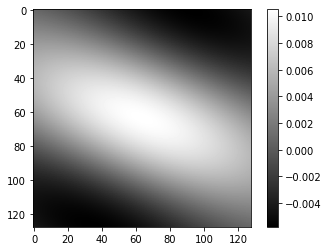

In [ ]:
# the receptive fields of the 5 neurons with the fastest spike rate
receptive_field(int(df_rank[df_rank['rank_fast']==1]['NeuronIndex']))

1


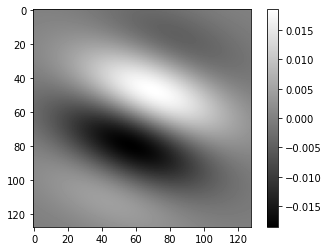

In [ ]:
receptive_field(int(df_rank[df_rank['rank_fast']==2]['NeuronIndex']))

56


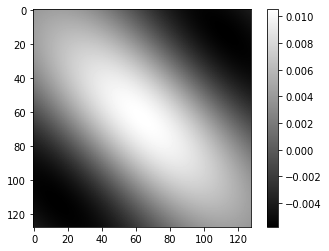

In [ ]:
receptive_field(int(df_rank[df_rank['rank_fast']==3]['NeuronIndex']))

20


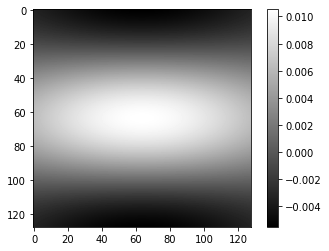

In [ ]:
receptive_field(int(df_rank[df_rank['rank_fast']==4]['NeuronIndex']))

62


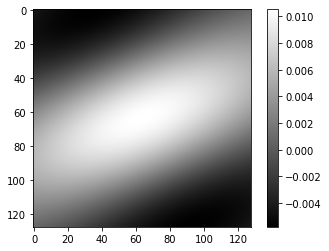

In [ ]:
receptive_field(int(df_rank[df_rank['rank_fast']==5]['NeuronIndex']))

677      677
7651    7651
Name: NeuronIndex, dtype: int64
7


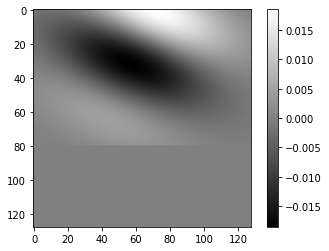

In [ ]:
# the receptive fields of the 5 neurons with the slowest spike rate
print(df_rank[df_rank['rank_slow']==1.5]['NeuronIndex']) # neuron 677 and 7651 only fired at the onset of the stimulus. If they are not considered as 'activated', I also included two sequential neurons
receptive_field(677)

17


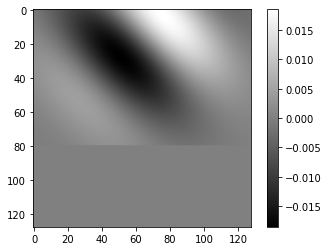

In [ ]:
receptive_field(7651)

29


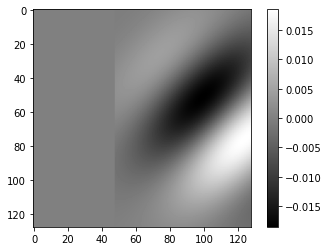

In [ ]:
receptive_field(int(df_rank[df_rank['rank_slow']==3]['NeuronIndex']))

53


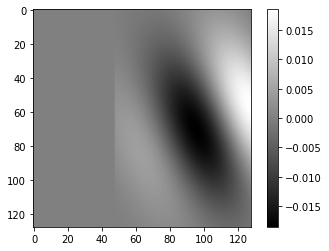

In [ ]:
receptive_field(int(df_rank[df_rank['rank_slow']==4]['NeuronIndex']))

5


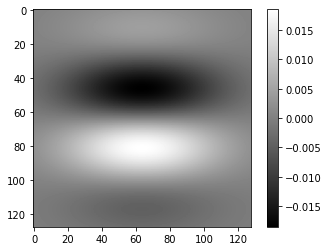

In [ ]:
receptive_field(int(df_rank[df_rank['rank_slow']==5]['NeuronIndex']))

# 2. Write an image encoder and decoder

### Decoder (reconstruct the image)

In [ ]:
# The decoder function
def decoder(cell_array):
  filter_matrix = np.zeros((10000, 128*128))
  for i in range(0,10000):
    GaborFilter = int(df.iloc[i]['GaborFilter'].strip('GaborFilter_'))
    filter = all_arr[:,:,GaborFilter-1].flatten()
    filter_matrix[i,:] = filter
  reconst_image = np.matmul(cell_array, filter_matrix).reshape(128,128)
  return reconst_image

### Encoder

In [ ]:
# The encoder function
def encoder(im, score_type, raster):
  im = image.imread(im)
  im_linear = im.flatten()
  filter_matrix = np.zeros((10000, 128*128))
  for i in range(0,10000):
    GaborFilter = int(df.iloc[i]['GaborFilter'].strip('GaborFilter_'))
    filter = all_arr[:,:,GaborFilter-1].flatten()
    filter_matrix[i,:] = filter
  score = np.matmul(im_linear, np.transpose(filter_matrix))

  if raster == 'N':
    return score

  elif raster == 'Y':

    if score_type == 'rate':
      adjusted_score = (score + 80)/1000
      firing_matrix = np.empty((10000,5000))
      firing_matrix[:] = np.NaN
      for j in range(0,10000):
        t = []
        time = 0
        # print(j)
        while time < 5000 or time == 5000:
          ISI = np.random.exponential()/(adjusted_score[j])
          time += ISI
          t.append(time)
        firing_matrix[j,0:len(t)] = [x+5000 for x in t]

    elif score_type == 'latency':
      adjusted_score = score - min(score)
      firing_matrix = np.empty((10000,5000))
      firing_matrix[:] = np.NaN
      max_rate = (max(score)+80)/1000
      min_rate = (min(score)+80)/1000
      for j in range(0,10000):
        t = []
        time = adjusted_score[j]
        # print(j)
        while time < 5000 or time == 5000:
          ISI = np.random.exponential()/np.random.uniform(min_rate, max_rate)
          time += ISI
          t.append(time)
        firing_matrix[j,0:len(t)] = [x+5000 for x in t]
    #plot
    neuron_subgroup = random.sample(range(0,9999), 100)
    plt.figure(figsize=(25,5))
    plt.eventplot(firing_matrix[np.array(neuron_subgroup),:],colors=colors)
    plt.xlim(4000, 11000)
    # plt.xlim(5000, 6000)
    plt.ylim(0, 100)
    plt.ylabel('Neuron')
    plt.xlabel('Time (ms)')
    a = 5000
    b = 10000
    plt.axvspan(a, b, color='y', alpha=0.5, lw=0)
    return score

### Some encoder demos

In [ ]:
#upload img1.png
uploaded = files.upload()

Saving img1.png to img1.png


array([-0.06611895,  0.12018999,  0.00538404, ...,  1.7510961 ,
        0.02331685, -0.08566441])

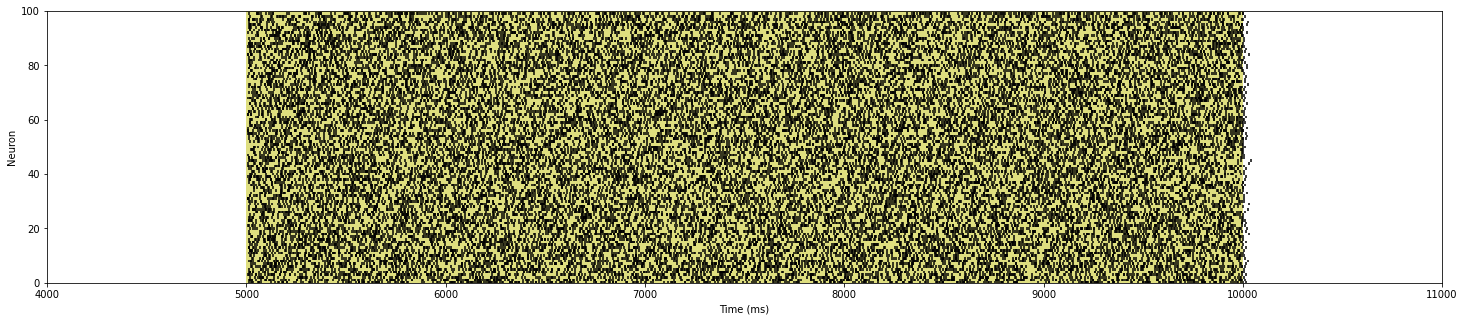

In [ ]:
# Demo 1: converting neuron scores to raster plot w/ spike latency code
encoder('img1.png', 'latency', 'Y')

array([-0.06611895,  0.12018999,  0.00538404, ...,  1.7510961 ,
        0.02331685, -0.08566441])

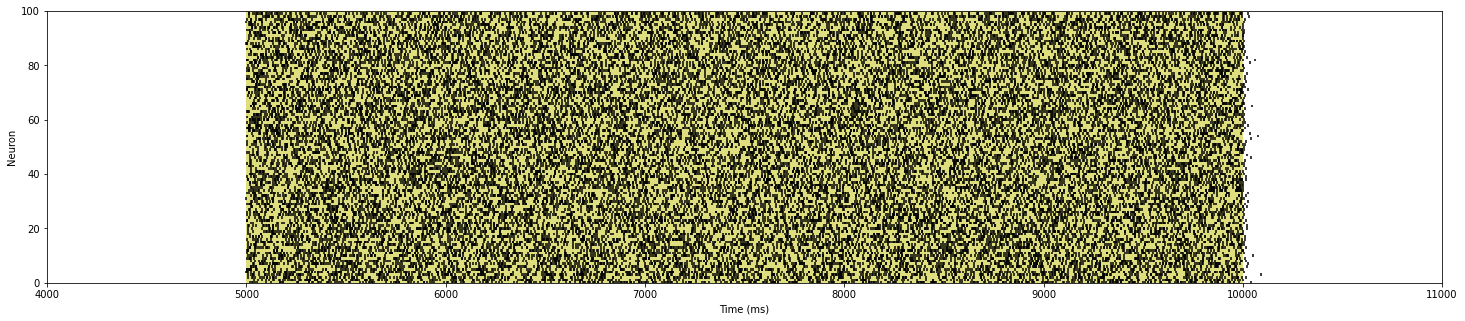

In [ ]:
# Demo 2: converting neuron scores to raster plot w/ spike rate code
encoder('img1.png', 'rate', 'Y')

### Check if the encoder-decoder pair is functional

In [ ]:
#upload img16.png
uploaded = files.upload()

Saving img16.png to img16.png


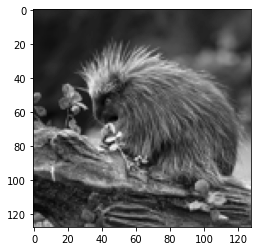

In [ ]:
# check if the encoder-decoder pair is functional #1
im = image.imread('img1.png')
plt.imshow(im,cmap='gray')

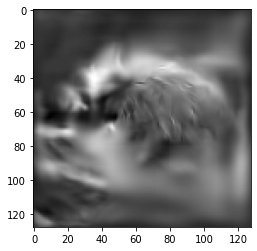

In [ ]:
plt.imshow(decoder(encoder('img1.png', 'rate', 'N')),cmap='gray')

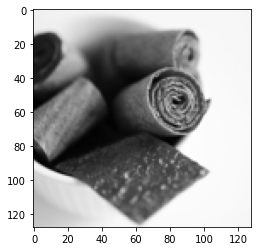

In [ ]:
# check if the encoder-decoder pair is functional #2
im = image.imread('img16.png')
plt.imshow(im,cmap='gray')

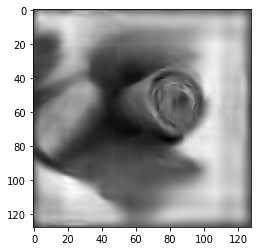

In [ ]:
plt.imshow(decoder(encoder('img16.png', 'latency', 'N')),cmap='gray')

# 3. Give Ford his answer

### Image reconstruction

In [ ]:
df_spiking['avg_firing_rate'] = df_spiking.apply(lambda x: x.count(), axis=1)
df_spiking['latency'] = df_spiking['0']-5000
df_spiking

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,avg_firing_rate,latency
0,5079.0,5082.0,5090.0,5092.0,5097.0,5114.0,5131.0,5138.0,5139.0,5149.0,5154.0,5160.0,5169.0,5207.0,5211.0,5216.0,5235.0,5239.0,5244.0,5246.0,5249.0,5286.0,5332.0,5334.0,5340.0,5360.0,5380.0,5408.0,5422.0,5433.0,5445.0,5449.0,5460.0,5468.0,5469.0,5480.0,5482.0,5494.0,5496.0,5502.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,374,79.0
1,5081.0,5090.0,5091.0,5098.0,5115.0,5119.0,5123.0,5138.0,5174.0,5179.0,5213.0,5218.0,5222.0,5238.0,5243.0,5253.0,5254.0,5266.0,5288.0,5291.0,5298.0,5304.0,5323.0,5324.0,5335.0,5342.0,5344.0,5345.0,5354.0,5356.0,5363.0,5365.0,5370.0,5374.0,5387.0,5412.0,5419.0,5430.0,5432.0,5444.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,415,81.0
2,5080.0,5131.0,5138.0,5140.0,5156.0,5160.0,5175.0,5278.0,5299.0,5314.0,5324.0,5330.0,5336.0,5350.0,5354.0,5359.0,5370.0,5372.0,5382.0,5412.0,5429.0,5439.0,5448.0,5472.0,5475.0,5485.0,5489.0,5494.0,5531.0,5534.0,5546.0,5641.0,5672.0,5681.0,5686.0,5716.0,5722.0,5724.0,5738.0,5764.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,345,80.0
3,5080.0,5084.0,5088.0,5099.0,5110.0,5130.0,5163.0,5189.0,5204.0,5206.0,5207.0,5221.0,5223.0,5232.0,5254.0,5269.0,5301.0,5327.0,5328.0,5357.0,5367.0,5377.0,5387.0,5393.0,5394.0,5419.0,5425.0,5427.0,5443.0,5445.0,5450.0,5457.0,5467.0,5496.0,5508.0,5511.0,5512.0,5517.0,5534.0,5545.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,438,80.0
4,5080.0,5099.0,5114.0,5131.0,5152.0,5156.0,5182.0,5185.0,5209.0,5212.0,5234.0,5249.0,5271.0,5285.0,5295.0,5296.0,5309.0,5311.0,5321.0,5331.0,5345.0,5357.0,5369.0,5398.0,5403.0,5423.0,5466.0,5484.0,5492.0,5496.0,5497.0,5513.0,5514.0,5528.0,5561.0,5564.0,5576.0,5584.0,5595.0,5602.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,349,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5077.0,5093.0,5099.0,5119.0,5135.0,5141.0,5142.0,5146.0,5151.0,5152.0,5153.0,5157.0,5162.0,5168.0,5171.0,5197.0,5201.0,5209.0,5211.0,5220.0,5231.0,5237.0,5245.0,5254.0,5264.0,5270.0,5278.0,5305.0,5326.0,5340.0,5341.0,5348.0,5361.0,5371.0,5381.0,5404.0,5409.0,5425.0,5433.0,5436.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,437,77.0
9996,5079.0,5087.0,5102.0,5110.0,5120.0,5128.0,5145.0,5169.0,5190.0,5200.0,5203.0,5208.0,5222.0,5226.0,5228.0,5241.0,5277.0,5278.0,5287.0,5295.0,5306.0,5311.0,5342.0,5347.0,5355.0,5359.0,5362.0,5378.0,5379.0,5392.0,5405.0,5416.0,5422.0,5423.0,5428.0,5438.0,5440.0,5469.0,5485.0,5511.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,401,79.0
9997,5081.0,5084.0,5110.0,5114.0,5130.0,5133.0,5134.0,5136.0,5145.0,5164.0,5182.0,5183.0,5184.0,5201.0,5212.0,5225.0,5243.0,5252.0,5282.0,5286.0,5306.0,5324.0,5338.0,5339.0,5356.0,5371.0,5373.0,5412.0,5421.0,5423.0,5427.0,5434.0,5438.0,5458.0,552

In [ ]:
# latency array 1*10000
latency_array = (df_spiking['latency'].to_numpy())-80
# spiking frequency array 1*10000
spiking_frequency_array = ((df_spiking['avg_firing_rate'].to_numpy())/5)-80
# transform the 128*128*10000 filter matrix to 10000*128^2 matrix
# filter_matrix = np.zeros((10000, 128*128))
# for i in range(0,10000):
#   GaborFilter = int(df.iloc[i]['GaborFilter'].strip('GaborFilter_'))
#   filter = all_arr[:,:,GaborFilter-1].flatten()
#   filter_matrix[i,:] = filter

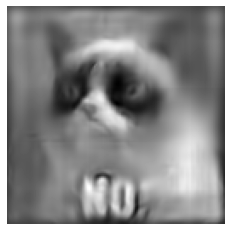

In [ ]:
# Use the decoder to decode the population activity via assuming a spike latency code
m = decoder(latency_array)
rotate_m_latency = [[m[j][i] for j in range(len(m))] for i in range(len(m[0])-1,-1,-1)]
plt.imshow(rotate_m_latency,cmap='gray')
ax=plt.gca()
ax.set_axis_off()

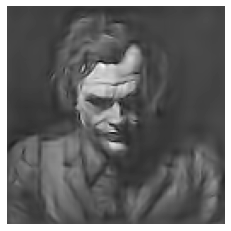

In [ ]:
# Use the decoder to decode the population activity via assuming a spike rate code
m = decoder(spiking_frequency_array)
rotate_m_rate = [[m[j][i] for j in range(len(m))] for i in range(len(m[0])-1,-1,-1)]
plt.imshow(rotate_m_rate,cmap='gray')
ax=plt.gca()
ax.set_axis_off()

### Write some Python code to loop over all of the possible images and automatically identify whether your decoded image is present in the image set

In [ ]:
#upload all img().png
uploaded = files.upload()

Saving img1.png to img1 (1).png
Saving img2.png to img2.png
Saving img3.png to img3.png
Saving img4.png to img4.png
Saving img5.png to img5.png
Saving img6.png to img6.png
Saving img7.png to img7.png
Saving img8.png to img8.png
Saving img9.png to img9.png
Saving img10.png to img10.png
Saving img11.png to img11.png
Saving img12.png to img12.png
Saving img13.png to img13.png
Saving img14.png to img14.png
Saving img15.png to img15.png
Saving img16.png to img16 (1).png
Saving img17.png to img17.png
Saving img18.png to img18.png
Saving img19.png to img19.png
Saving img20.png to img20.png
Saving img21.png to img21.png
Saving img22.png to img22.png
Saving img23.png to img23.png
Saving img24.png to img24.png


In [ ]:
#I used mean_squared_error as the loss function here
from sklearn.metrics import mean_squared_error

In [ ]:
# The function that normalize the decoded image
# def NormalizeData(data):
#     return (data - np.min(data)) / (np.max(data) - np.min(data))

In [ ]:
# The function that automatically identify the decoded image
def whichone(pred):
  # norm_pred = NormalizeData(pred)
  # zero_image = np.zeros((128,128))
  mse = np.zeros(24)
  for i in range(0,24):
    query = image.imread('img'+str(i+1)+'.png')
    # sub = query - norm_pred
    m = mean_squared_error(query, pred)
    mse[i] = m
  plt.plot(mse)
  if np.std(mse) < 1.1:
    return 'This decoded image is not presented in the image set'
  elif np.std(mse) > 1.1:
    which = str(np.where(mse == np.min(mse))).replace("(array([","")
    which = which.replace("]),)","")
    return 'This decoded image is presented in the image set, and corresponds to img #' + str(int(which)+1)

'This decoded image is presented in the image set, and corresponds to img #11'

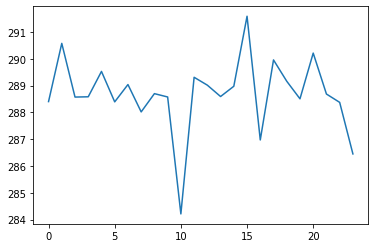

In [ ]:
whichone(rotate_m_rate)

Frod was wrong, this reconstructed image decoded from rate code is presented in the image set, and corresponds to img11.png.

Mini extra credit (0.5 points): It is not important to know the offset because the poisson distribution will generate noise, and a offset only change the baseline. Therefore, you can always normalize (or scale) the score to counteract the noise.

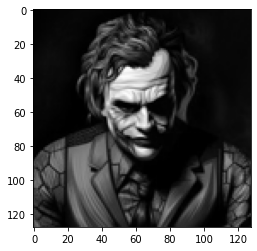

In [ ]:
#original image#11
im = image.imread('img11.png')
plt.imshow(im,cmap='gray')

'This decoded image is not presented in the image set'

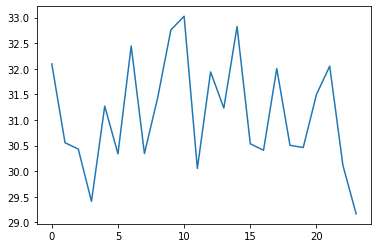

In [ ]:
whichone(rotate_m_latency)